# Telecom Churn case study using PCA and Ensemble

### Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

### Goal
It is your job to predict if a customer will churn, given the ~170 columns containing customer behavior, usage patterns, payment patterns, and other features that might be relevant. Your target variable is "churn_probability"
Note: Make sure your accuracy is greater than the sample submission that is present in the leaderboard

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings

from sklearn import metrics
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# to ignore the warnings
warnings.filterwarnings('ignore')

## Step 1. Reading, Understanding and Visualizing the data

In [2]:
telecom_train_df = pd.read_csv('train (1).csv')
telecom_test_df = pd.read_csv('test (1).csv')
telecom_test_sol_df = pd.read_csv('solution (1).csv')

In [3]:
telecom_train_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
telecom_test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [5]:
telecom_test_sol_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [6]:
telecom_train_df.shape

(69999, 172)

In [7]:
telecom_test_df.shape

(30000, 171)

In [8]:
telecom_train_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [9]:
telecom_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [10]:
telecom_train_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [11]:
telecom_train_df.isna().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [12]:
telecom_train_df.dtypes

id                     int64
circle_id              int64
loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
                      ...   
aon                    int64
aug_vbc_3g           float64
jul_vbc_3g           float64
jun_vbc_3g           float64
churn_probability      int64
Length: 172, dtype: object

In [13]:
# Columns which we have to impute as Zero as thy should not be dropped based on missing values becuase they are important.
rech_cols_to_impute = [x for x in telecom_train_df.columns if 'rech' in x and 
                       'count' not in x and 'date' not in x and 'num' not in x]
telecom_train_df[rech_cols_to_impute] = telecom_train_df[rech_cols_to_impute].apply(lambda x: x.fillna(0))
telecom_test_df[rech_cols_to_impute] = telecom_test_df[rech_cols_to_impute].apply(lambda x: x.fillna(0))


### Dropping rows for both train and test datasets
 - Rows which are empty

In [14]:
telecom_train_df.dropna(axis=0, how='all', inplace=True)
telecom_test_df.dropna(axis=0, how='all', inplace=True)

In [15]:
print(telecom_train_df.shape)
print(telecom_test_df.shape)

(69999, 172)
(30000, 171)


### Dropping columns for both train and test datasets

    - Not needed columns like Id, last_date_of_month_6 etc.
    - Columns having more than 70% values as null

In [16]:
# For us dates doesn't matter as long as customer is doing a recharge.
cols_to_delete = ['id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                  'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
                  'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'
                 ]
telecom_train_df.drop(cols_to_delete, axis=1, inplace=True)
telecom_test_df.drop(cols_to_delete, axis=1, inplace=True)

In [17]:
# to check the % of null values
round((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index)),2)[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values()

arpu_3g_8           0.74
night_pck_user_8    0.74
night_pck_user_7    0.74
arpu_2g_8           0.74
arpu_2g_7           0.74
fb_user_7           0.74
arpu_3g_7           0.74
fb_user_8           0.74
count_rech_3g_8     0.74
count_rech_3g_7     0.74
count_rech_2g_8     0.74
count_rech_2g_7     0.74
arpu_2g_6           0.75
count_rech_3g_6     0.75
night_pck_user_6    0.75
fb_user_6           0.75
arpu_3g_6           0.75
count_rech_2g_6     0.75
dtype: float64

In [18]:
# count of missing data > 70% columns in train dataset
len(round((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index)),2)[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values())

18

In [19]:
# count of missing data > 70% columns in test dataset
len(round((pd.isnull(telecom_test_df).sum()/len(telecom_test_df.index)),2)[pd.isnull(telecom_test_df).sum()/ len(telecom_test_df.index) > 0.70].sort_values())

18

### As we have more than 70% data as null for 18 columns in train and test, we are dropping these columns from dataset.

In [20]:
cols_to_delete = ((pd.isnull(telecom_train_df).sum()/len(telecom_train_df.index))[pd.isnull(telecom_train_df).sum()/ len(telecom_train_df.index) > 0.70].sort_values()).keys()

In [21]:
cols_to_delete = cols_to_delete.to_list()
print(cols_to_delete)

['arpu_3g_8', 'night_pck_user_8', 'arpu_2g_8', 'count_rech_3g_8', 'fb_user_8', 'count_rech_2g_8', 'arpu_3g_7', 'fb_user_7', 'arpu_2g_7', 'night_pck_user_7', 'count_rech_2g_7', 'count_rech_3g_7', 'count_rech_3g_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6', 'count_rech_2g_6']


In [22]:
telecom_train_df = telecom_train_df.drop(cols_to_delete, axis=1)

In [23]:
telecom_train_df.shape

(69999, 144)

In [24]:
telecom_test_df = telecom_test_df.drop(cols_to_delete, axis=1)

In [25]:
telecom_test_df.shape

(30000, 143)

## Lets check the data types of columns now

In [26]:
telecom_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Columns: 144 entries, circle_id to churn_probability
dtypes: float64(117), int64(27)
memory usage: 77.4 MB


In [27]:
telecom_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Columns: 143 entries, circle_id to jun_vbc_3g
dtypes: float64(117), int64(26)
memory usage: 33.0 MB


### We can see now we don't have any categorical data, all are numerical data only.

### Imputing the na values with
 - Median for numerical variables
 - Mode for categorical variables - Not needed in out this case.

In [28]:
# A generic method to impute na
def replace_na(df, columns, data_type):
    for col in columns:
        if data_type == 'categorical':
            value = pd.to_datetime(df[col]).mode()
        else:
            value = df[col].median()
        df[col].fillna(value, inplace=True)
    return df

In [29]:
telecom_train_df = replace_na(telecom_train_df, telecom_train_df.columns, 'numerical')
telecom_test_df = replace_na(telecom_test_df, telecom_test_df.columns, 'numerical')

### Lets check for unique entries in train and test dataset

In [30]:
def cols_to_delete_unique(df, df_columns, threshold=4):
    # threshold=4 means column has only 1 unique value
    # eg. telecom_train_df['circle_id'].describe().unique() --> array([30000.,   109.,     0.])
    # Here because there are all 109 in column, we have only 3 entries in array.
    cols_to_delete = []
    for column in df_columns:
        if len(df[column].describe().unique()) < threshold:
            cols_to_delete.append(column)
    
    return cols_to_delete

In [31]:
print(telecom_train_df.shape)
print(telecom_test_df.shape)

(69999, 144)
(30000, 143)


In [32]:
# on train data
telecom_train_df = telecom_train_df.drop(cols_to_delete_unique(telecom_train_df, telecom_train_df.columns), axis=1)
print(telecom_train_df.shape)

# on test data
telecom_test_df = telecom_test_df.drop(cols_to_delete_unique(telecom_test_df, telecom_test_df.columns), axis=1)
print(telecom_test_df.shape)

(69999, 134)
(30000, 133)


### Lets find the high value customers based on recharge done in 6th and 7th month and update dataframe

### For train data

In [33]:
# total data recharge in 6th, 7th and 8th months
telecom_train_df["total_data_recharge_amnt_6"] = telecom_train_df.total_rech_data_6 * telecom_train_df.av_rech_amt_data_6
telecom_train_df["total_data_recharge_amnt_7"] = telecom_train_df.total_rech_data_7 * telecom_train_df.av_rech_amt_data_7
telecom_train_df["total_data_recharge_amnt_8"] = telecom_train_df.total_rech_data_8 * telecom_train_df.av_rech_amt_data_8

# total amount spent on recharge in 6th, 7th and 8th months
telecom_train_df["total_recharge_amnt_6"] = telecom_train_df.total_rech_amt_6 + telecom_train_df.total_data_recharge_amnt_6
telecom_train_df["total_recharge_amnt_7"] = telecom_train_df.total_rech_amt_7 + telecom_train_df.total_data_recharge_amnt_7
telecom_train_df["total_recharge_amnt_8"] = telecom_train_df.total_rech_amt_8 + telecom_train_df.total_data_recharge_amnt_8

# average recharge for 6th and 7th month
telecom_train_df['average_amnt_6_7'] = (telecom_train_df["total_recharge_amnt_6"] + telecom_train_df["total_recharge_amnt_7"])/2

# 70th percentile of average_amnt_6_7
telecom_train_df['average_amnt_6_7'].quantile(.70)

477.5

## Filter dataset based on average_amnt_6_7 (70th percentile for train dataset is 477.5)

In [34]:
telecom_train_df = telecom_train_df[telecom_train_df["average_amnt_6_7"]>= telecom_train_df["average_amnt_6_7"].quantile(.70)]

In [35]:
telecom_train_df.shape

(21013, 141)

In [36]:
# Lets remove not needed newly added features
telecom_train_df.drop(['total_data_recharge_amnt_6', 'total_data_recharge_amnt_7', 'total_data_recharge_amnt_8',
                        'total_recharge_amnt_6', 'total_recharge_amnt_7', 'total_recharge_amnt_8',
                        'average_amnt_6_7'], 
                      axis=1, inplace=True)

## Lets visualize the 8th month and average_amnt_6_7 months data to check behavior pattern of customers

In [37]:
# Look it later
#plt.scatter(telecom_train_df[['average_amnt_6_7', 'total_recharge_amnt_8']])
#plt.show()
#sns.
#telecom_train_df.plot.scatter(x='average_amnt_6_7', y='total_recharge_amnt_8')
#telecom_train_df.DataFrame(np.random.rand(10, 3), columns =['average_amnt_6_7', 'total_recharge_amnt_8'])

#telecom_train_df.plot.bar(x="average_amnt_6_7", y="total_recharge_amnt_8", rot=70);

#ig, ax = plt.subplots()

#ax.plot(telecom_train_df['average_amnt_6_7'], telecom_train_df['total_recharge_amnt_8'])
#plt.show()

## Lets focus on Outliers now and treat them

In [38]:
# Generic method to remove outliers
def remove_outliers(df, features):
    for feature in features:
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.99)
        iqr = q3-q1
        lower_value  = q1 - (1.5 * iqr)
        higer_value = q3 + (1.5 * iqr)
        df = df[(df[feature] <= higer_value) & (df[feature] >= lower_value)]
    return df

In [39]:
#telecom_train_df = remove_outliers(telecom_train_df, telecom_train_df.columns)
#telecom_test_df = remove_outliers(telecom_test_df, telecom_test_df.columns)

In [40]:
telecom_train_df.shape

(21013, 134)

In [41]:
telecom_test_df.shape

(30000, 133)

## Let's check for Data imbalance here

In [42]:
churn_data_rows = telecom_train_df['churn_probability'].sum()

In [43]:
churn_data_rows/len(telecom_train_df) * 100

8.275829248560415

### We can see that there is a data imbalance. We have only about 8.28% of data as Churn and 91.72% as not churn.
### So we need to apply data imbalance technique. We will use SMOTE.

## Dividing the data from telecom_train_df to train the model

In [44]:
y = telecom_train_df['churn_probability']
X = telecom_train_df.drop(['churn_probability'], axis=1)

telecom_train_df.drop('churn_probability', axis=1, inplace=True)

In [45]:
# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Taking a backup of variables

In [46]:
X_train_ori, X_test_ori, y_train_ori, y_test_ori = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

## Rescaling of the variables

- We will use Min-Max scaling (Normalization) --> compresses all the data between 0 and 1

In [47]:
# Creating MinMaxScaler object
scaler = MinMaxScaler()
# fit on data
# removed churn_probability becuase test data is not having it.
# Also churn_probability is having 0 and 1 only. So it need not be scaled.
train_numerical_columns = telecom_train_df.columns.to_list()
X_train[train_numerical_columns] = scaler.fit_transform(X_train[train_numerical_columns])
X_train.head()
# So all numberic values are now between 0 and 1

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
6968,0.127277,0.274576,0.081830,0.004624,0.004018,0.002985,0.011537,0.040985,0.006554,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.337600,0.000000,0.002051,0.000000
42203,0.156166,0.094305,0.083632,0.066057,0.041462,0.074009,0.065428,0.053213,0.049054,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.009660,0.000000,0.000000,0.000000
18406,0.151447,0.122733,0.087708,0.015153,0.016084,0.008306,0.056327,0.259820,0.136117,0.005055,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.702487,0.000000,0.000000,0.000000
21455,0.171177,0.128305,0.077781,0.009636,0.010909,0.006579,0.081607,0.121132,0.038009,0.005166,...,0.0,0.0,0.0,0.000000,0.030303,0.02439,0.542381,0.029661,0.043865,0.039021
66143,0.138174,0.087866,0.074838,0.000000,0.006171,0.001633,0.000000,0.033354,0.020053,0.000000,...,0.0,0.0,0.0,0.034483,0.000000,0.00000,0.055301,0.098218,0.000000,0.000000


In [48]:
from imblearn.over_sampling import SMOTE ## Comments to be fixed 

In [49]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [50]:
X_resampled.shape

(27020, 133)

In [51]:
sum(y_resampled)/len(y_resampled) * 100

50.0

In [52]:
telecom_test_df.shape

(30000, 133)

## Now there is no data imbalance.

In [53]:
# Lets fit the scaler for train data as well
test_numerical_columns = telecom_test_df.columns.to_list()
telecom_test_df[test_numerical_columns] = scaler.transform(telecom_test_df[test_numerical_columns])
telecom_test_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.132455,0.074824,0.049909,0.004308,0.002480,0.002149,0.007194,0.004771,0.002487,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.365129,0.000000,0.000000,0.0000
1,0.150615,0.099685,0.064554,0.010236,0.005052,0.001845,0.056723,0.092260,0.028195,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.568220,0.000000,0.000000,0.0000
2,0.145864,0.095230,0.083592,0.001022,0.000963,0.000781,0.002031,0.006797,0.003215,0.008728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.023424,0.040694,0.082745,0.0319
3,0.129731,0.080680,0.047931,0.000720,0.000265,0.000000,0.004788,0.030417,0.001714,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.256943,0.000000,0.000000,0.0000
4,0.144568,0.093651,0.067145,0.061129,0.074656,0.065164,0.007287,0.003537,0.005294,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.068099,0.000000,0.000000,0.0000


## Modelling 

1. Logistic Regression using RFE - To get important predictors for Churn probability
2. Logistic Regression - To know Churn probability + PCA
    - Lasso
    - Ridge
3. Tree models
    - XGBoost
    - Random Forest

## 1. Logistic Regression using RFE - To get importnat predictors for Churn probability

In [54]:
# For RFE
logml = sm.GLM(y_resampled, (sm.add_constant(X_resampled)), family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26889
Model Family:                Binomial   Df Model:                          130
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8691.3
Date:                Sat, 17 Sep 2022   Deviance:                       17383.
Time:                        10:31:07   Pearson chi2:                 7.90e+04
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.2327      0.672     -4.808      0.000      -4.550      -1.915
arpu_6                 7.6452      3.682      2.077      0.038       0.430      14.861
arpu_7                19.4164      4.344      4.469      0.000      10.902      27.931
arpu_8                34.2890      4.909      6.984      0.000      24.667      43.911
onnet_mou_6          -98.5392     35.462     -2.779      0.005    -168.043     -29.035
onnet_mou_7          -23.8530     31.525     -0.757      0.449     -85.641      37.935
onnet_mou_8          -24.5716     49.594     -0.495      0.620    -121.774      72.631
offnet_mou_6        -101.0084     39.825     -2.536      0.011    -179.063     -22.954
offnet_mou_7         -21.5894     25.172     -0.858      0.391     -70.925      27.746
offnet_mou_8         -76.6540     63.190     -1.213      0.225    -200.504      47.196
roam_ic_mou_6          1.5033      1.091      1.378      0.168      -0.636       3.642
roam_ic_mou_7          1.3534      1.293      1.047      0.295      -1.181       3.888
roam_ic_mou_8         -1.9156      1.369     -1.399      0.162      -4.599       0.767
roam_og_mou_6         48.4592     18.109      2.676      0.007      12.966      83.952
roam_og_mou_7         12.5137     10.644      1.176      0.240      -8.349      33.376
roam_og_mou_8         26.5598     24.378      1.090      0.276     -21.220      74.339
loc_og_t2t_mou_6   -2.714e+04   2.53e+04     -1.074      0.283   -7.67e+04    2.24e+04
loc_og_t2t_mou_7   -1308.6279   2.85e+04     -0.046      0.963   -5.72e+04    5.45e+04
loc_og_t2t_mou_8    1.983e+05   4.39e+04      4.513      0.000    1.12e+05    2.84e+05
loc_og_t2m_mou_6   -1.983e+04   1.85e+04     -1.075      0.282    -5.6e+04    1.63e+04
loc_og_t2m_mou_7    -808.4088   1.75e+04     -0.046      0.963   -3.52e+04    3.36e+04
loc_og_t2m_mou_8    9.151e+04   2.03e+04      4.514      0.000    5.18e+04    1.31e+05
loc_og_t2f_mou_6   -2612.7955   2426.610     -1.077      0.282   -7368.865    2143.274
loc_og_t2f_mou_7    -144.6729   3139.418     -0.046      0.963   -6297.820    6008.474
loc_og_t2f_mou_8    1.085e+04   2403.786      4.515      0.000    6142.041    1.56e+04
loc_og_t2c_mou_6      -8.3567      1.470     -5.684      0.000     -11.238      -5.475
loc_og_t2c_mou_7      -2.6240      2.542     -1.032      0.302      -7.606       2.358
loc_og_t2c_mou_8       7.1532      1.592      4.493      0.000       4.032      10.274
loc_og_mou_6       -7681.4616   4.75e+04     -0.162      0.871   -1.01e+05    8.54e+04
loc_og_mou_7       -3.991e+04   3.48e+04     -1.146      0.252   -1.08e+05    2.83e+04
loc_og_mou_8       -2.498e+05   5.36e+04     -4.658      0.000   -3.55e+05   -1.45e+05
std_og_t2t_mou_6   -5.961e+04    3.5e+04     -1.705      0.088   -1.28e+05    8918.286
std_og_t2t_mou_7   -4.655e+04      4e+

## Lower the p-value higher the significance

In [55]:
logreg = LogisticRegression()

In [56]:
# Running rfe with 70 variables as output
rfe = RFE(logreg, n_features_to_select=70)
rfe = rfe.fit(X_resampled, y_resampled)

In [57]:
rfe.support_ # it givs whether or not the selected feature was in top 70. True means yes

array([ True,  True,  True,  True,  True, False,  True,  True, False,
       False, False, False, False,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False,  True,  True, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,

In [58]:
# to see the selected columns
list(zip(X_resampled.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 43),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 2),
 ('roam_ic_mou_6', False, 5),
 ('roam_ic_mou_7', False, 37),
 ('roam_ic_mou_8', False, 59),
 ('roam_og_mou_6', False, 28),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 35),
 ('loc_og_t2t_mou_7', False, 39),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', False, 23),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', True, 1),
 ('loc_og_t2c_mou_7', False, 3),
 ('loc_og_t2c_mou_8', False, 6),
 ('loc_og_mou_6', False, 61),
 ('loc_og_mou_7', True, 1),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 34),
 ('std_og_t2t_mou_7', False, 11),
 ('std_og_t2t_mou_8', False, 38),
 ('st

In [59]:
col = X_resampled.columns[rfe.support_]

In [60]:
X_resampled_sm = sm.add_constant(X_resampled[col])
logm2 = sm.GLM(y_resampled, X_resampled_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26950
Model Family:                Binomial   Df Model:                           69
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8946.7
Date:                Sat, 17 Sep 2022   Deviance:                       17893.
Time:                        10:31:32   Pearson chi2:                 1.26e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.8314      0.515     -3.556      0.000      -2.841      -0.822
arpu_6                 4.5507      3.316      1.372      0.170      -1.948      11.049
arpu_7                 7.6410      2.348      3.255      0.001       3.039      12.243
arpu_8                27.4583      4.769      5.757      0.000      18.111      36.806
onnet_mou_6            1.6075      0.564      2.850      0.004       0.502       2.713
onnet_mou_7          -34.3906     12.267     -2.803      0.005     -58.434     -10.347
offnet_mou_6           1.3661      0.714      1.912      0.056      -0.034       2.766
offnet_mou_7         -28.3452     10.147     -2.793      0.005     -48.233      -8.458
roam_og_mou_7         16.8580      4.194      4.019      0.000       8.637      25.079
roam_og_mou_8          4.2787      1.439      2.974      0.003       1.459       7.099
loc_og_t2t_mou_8    1.079e+04    3.8e+04      0.284      0.776   -6.37e+04    8.52e+04
loc_og_t2m_mou_6      -3.1011      0.949     -3.266      0.001      -4.962      -1.240
loc_og_t2m_mou_7      -4.7204      1.715     -2.752      0.006      -8.083      -1.358
loc_og_t2m_mou_8    4987.5278   1.75e+04      0.285      0.776   -2.94e+04    3.93e+04
loc_og_t2f_mou_6      -5.3526      1.676     -3.194      0.001      -8.637      -2.068
loc_og_t2f_mou_8     593.2273   2078.473      0.285      0.775   -3480.504    4666.959
loc_og_t2c_mou_6      -6.1502      1.212     -5.072      0.000      -8.527      -3.774
loc_og_mou_7          37.9786     11.661      3.257      0.001      15.123      60.834
loc_og_mou_8       -1.106e+04    3.9e+04     -0.283      0.777   -8.75e+04    6.54e+04
std_og_t2m_mou_8      -4.2461      2.002     -2.121      0.034      -8.170      -0.322
std_og_t2f_mou_8      -5.2111      1.548     -3.366      0.001      -8.245      -2.177
std_og_mou_7          38.5588     12.234      3.152      0.002      14.580      62.537
std_og_mou_8          55.5850     38.223      1.454      0.146     -19.330     130.500
spl_og_mou_8           1.2201      2.364      0.516      0.606      -3.413       5.853
total_og_mou_8       -65.6033     38.798     -1.691      0.091    -141.646      10.440
loc_ic_t2t_mou_8   -3345.8011   8573.088     -0.390      0.696   -2.01e+04    1.35e+04
loc_ic_t2m_mou_6       3.1082      1.892      1.643      0.100      -0.600       6.816
loc_ic_t2m_mou_8   -3904.4204      1e+04     -0.390      0.697   -2.35e+04    1.57e+04
loc_ic_t2f_mou_8   -1239.3909   3150.714     -0.393      0.694   -7414.676    4935.894
loc_ic_mou_6           2.5179      2.467      1.021      0.307      -2.317       7.353
loc_ic_mou_7          15.1440      1.658      9.131      0.000      11.893      18.395
loc_ic_mou_8        4421.9050   1.15e+04      0.386      0.699    -1.8e+04    2.69e+04
std_ic_t2t_mou_6       6.0695      1.6

### Making predictions on the test set

In [61]:
X_test = X_test[col]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 5662 to 36425
Data columns (total 70 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              6304 non-null   float64
 1   arpu_7              6304 non-null   float64
 2   arpu_8              6304 non-null   float64
 3   onnet_mou_6         6304 non-null   float64
 4   onnet_mou_7         6304 non-null   float64
 5   offnet_mou_6        6304 non-null   float64
 6   offnet_mou_7        6304 non-null   float64
 7   roam_og_mou_7       6304 non-null   float64
 8   roam_og_mou_8       6304 non-null   float64
 9   loc_og_t2t_mou_8    6304 non-null   float64
 10  loc_og_t2m_mou_6    6304 non-null   float64
 11  loc_og_t2m_mou_7    6304 non-null   float64
 12  loc_og_t2m_mou_8    6304 non-null   float64
 13  loc_og_t2f_mou_6    6304 non-null   float64
 14  loc_og_t2f_mou_8    6304 non-null   float64
 15  loc_og_t2c_mou_6    6304 non-null   float64
 16  lo

In [62]:
X_test_sm = sm.add_constant(X_test)

In [63]:
y_test_pred = res.predict(X_test_sm)

In [64]:
y_test_pred[:10]

5662     0.0
37574    0.0
58341    0.0
23282    0.0
30561    0.0
45844    0.0
30159    0.0
62778    0.0
45559    0.0
35274    0.0
dtype: float64

In [65]:
X_test_sm.head()

,const,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_og_mou_7,roam_og_mou_8,...,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_7,sachet_3g_8,aug_vbc_3g
5662,1.0,554.740,782.352,673.692,36.86,38.63,649.01,845.83,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0.00
37574,1.0,1563.157,1579.675,1256.565,2761.74,3158.18,1358.03,1144.44,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0.00
58341,1.0,594.217,796.737,996.393,785.66,1200.53,149.53,186.48,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0.00
23282,1.0,352.160,197.245,365.564,192.04,179.88,508.53,116.58,34.96,0.0,...,0,0,0,3,0,0,0,0,0,0.00
30561,1.0,332.040,275.976,267.033,116.49,96.89,152.34,178.24,0.00,0.0,...,0,0,0,0,0,0,0,1,0,31.05


In [66]:
X_resampled_sm.shape

(27020, 71)

In [67]:
y_pred_train = res.predict(X_resampled_sm)

In [68]:
y_pred_train.head()

0    0.998392
1    0.079209
2    0.151947
3    0.044461
4    0.004588
dtype: float64

In [69]:
y_pred_train.shape

(27020,)

## Confusion matrix for Precision and Recall and Accuracy of the model

In [70]:
y_resampled

0        0
1        0
2        0
3        0
4        0
        ..
27015    1
27016    1
27017    1
27018    1
27019    1
Name: churn_probability, Length: 27020, dtype: int64

In [71]:
y_pred_train_final = pd.DataFrame({'Churn_Prob': y_pred_train})

In [72]:
y_pred_train_final.head()

,Churn_Prob
0,0.998392
1,0.079209
2,0.151947
3,0.044461
4,0.004588


In [73]:
y_pred_train_final['Churn_Prob_2'] =  y_pred_train_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [74]:
confusion = metrics.confusion_matrix(y_resampled, y_pred_train_final.Churn_Prob_2)
confusion

array([[11728,  1782],
       [ 1584, 11926]])

In [75]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return auc_score

In [76]:
# Metrics dict
metrics_dict = {}

In [77]:
def get_accuracy_params(y_actual, y_pred, y_proba, model):
    # Print ROC curve
    auc_score = draw_roc(y_actual, y_proba)
    confusion = metrics.confusion_matrix(y_actual, y_pred)
    print('confusion matrix: ')
    print(confusion)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    print('Accuracy: ', accuracy)
    precision = TP / (TP+FP)
    print('Precision: ', precision)
    recall = TP / (TP+FN)
    print('Recall: ', recall)
    f1_score = 2*precision*recall/(precision+recall)
    print('F1_score: ', f1_score)
    print('AUC score: ', auc_score)
    metrics_dict[model] = [accuracy, precision, recall, f1_score, auc_score]
    return metrics_dict

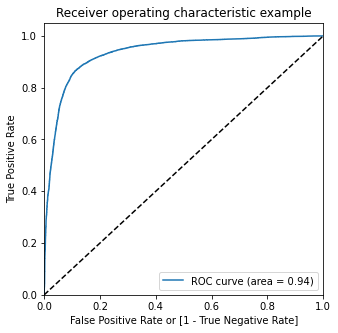

confusion matrix: 
[[11728  1782]
 [ 1584 11926]]
Accuracy:  0.8754256106587713
Precision:  0.8700029180040852
Recall:  0.8827535159141376
F1_score:  0.8763318392240429
AUC score:  0.9360727722590553


In [78]:
metrics_dict = get_accuracy_params(y_resampled, y_pred_train_final.Churn_Prob_2, y_pred_train_final.Churn_Prob, 'Logistic_rfe_train')

In [79]:
metrics_dict

{'Logistic_rfe_train': [0.8754256106587713,
  0.8700029180040852,
  0.8827535159141376,
  0.8763318392240429,
  0.9360727722590553]}

## With Logistic regression with RFE we get (on train dataset)

- TBD

### Let's check for test data set

In [80]:
telecom_test_df.shape

(30000, 133)

In [81]:
telecom_test_sol_df.shape

(30000, 2)

In [82]:
# Lets do prediction on telecom_test_df dataset

In [83]:
telecom_test_df_ori = telecom_test_df

In [84]:
telecom_test_df = telecom_test_df[col]
telecom_test_df = sm.add_constant(telecom_test_df)

In [85]:
y_pred_test = res.predict(telecom_test_df)

In [86]:
y_pred_test_final = pd.DataFrame({'Churn_Prob': y_pred_test})

In [87]:
y_pred_test_final.head()

,Churn_Prob
0,0.102041
1,0.311446
2,0.769823
3,0.118157
4,0.287507


In [88]:
y_pred_test_final['Churn_Prob_2'] =  y_pred_test_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

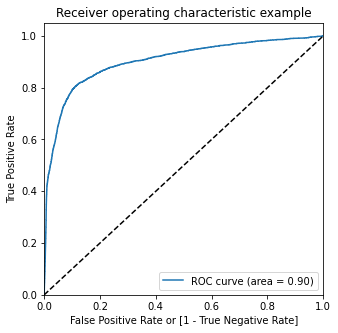

confusion matrix: 
[[21372  5569]
 [  415  2644]]
Accuracy:  0.8005333333333333
Precision:  0.32192864970169244
Recall:  0.864334749918274
F1_score:  0.46912704045422293
AUC score:  0.9028844513295365


In [89]:
metrics_dict = get_accuracy_params(telecom_test_sol_df.churn_probability, y_pred_test_final.Churn_Prob_2, y_pred_test_final.Churn_Prob, 'Logistic_rfe_test')

In [90]:
metrics_dict

{'Logistic_rfe_train': [0.8754256106587713,
  0.8700029180040852,
  0.8827535159141376,
  0.8763318392240429,
  0.9360727722590553],
 'Logistic_rfe_test': [0.8005333333333333,
  0.32192864970169244,
  0.864334749918274,
  0.46912704045422293,
  0.9028844513295365]}

### This seems a good model but lets compare with other models.

## PCA and Logistic Regression to check if model improves or not.

## PCA on the data

- While computing the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data.

In [91]:
# Looking at the data again

In [92]:
y_resampled.shape

(27020,)

In [93]:
X_resampled.shape

(27020, 133)

In [94]:
pca = PCA(random_state=42)

In [95]:
pca.fit(X_resampled)

PCA(random_state=42)

In [96]:
pca.components_

array([[ 1.67003180e-02,  1.20674217e-02, -6.04656906e-03, ...,
        -2.26439951e-02, -3.74215907e-02, -4.26596422e-02],
       [ 4.99955090e-02,  5.54865335e-02,  3.79838622e-02, ...,
        -1.95822932e-02, -3.95735865e-02, -5.52981470e-02],
       [ 4.69729148e-02,  7.04203072e-02,  6.61569896e-02, ...,
         8.20152366e-02,  1.31682293e-01,  1.45851186e-01],
       ...,
       [-0.00000000e+00,  6.52374472e-17, -1.32826169e-16, ...,
         8.96302732e-17, -2.87585331e-17,  4.76023607e-18],
       [ 0.00000000e+00,  2.42701303e-16,  2.58867155e-16, ...,
        -2.28686259e-17,  4.19527179e-17, -1.82650171e-17],
       [-0.00000000e+00, -1.32657996e-15, -5.04062281e-15, ...,
        -1.09270535e-15, -2.14980424e-16,  4.70800243e-16]])

In [97]:
pca.explained_variance_ratio_

array([1.92918548e-01, 1.57246676e-01, 7.42833605e-02, 6.04025961e-02,
       5.31979317e-02, 4.94982465e-02, 4.52654189e-02, 3.27217930e-02,
       2.09193281e-02, 2.02000883e-02, 1.90580783e-02, 1.77894923e-02,
       1.54347323e-02, 1.27528489e-02, 1.22605916e-02, 1.21111917e-02,
       1.08408961e-02, 1.03274374e-02, 1.01903689e-02, 9.50274119e-03,
       8.86035558e-03, 8.40354494e-03, 7.56412385e-03, 7.04267671e-03,
       6.82999841e-03, 6.62325753e-03, 6.42555682e-03, 5.76286299e-03,
       5.35320676e-03, 5.21460079e-03, 5.06463600e-03, 4.75613877e-03,
       4.19919171e-03, 3.93145934e-03, 3.43387145e-03, 3.24617676e-03,
       3.14904458e-03, 2.99745205e-03, 2.91344621e-03, 2.86504696e-03,
       2.78911269e-03, 2.67232917e-03, 2.56901717e-03, 2.51118291e-03,
       2.33329986e-03, 2.15787622e-03, 2.14830044e-03, 2.11377965e-03,
       1.98894152e-03, 1.77577931e-03, 1.73525140e-03, 1.68247071e-03,
       1.60918346e-03, 1.55453806e-03, 1.41696435e-03, 1.40131223e-03,
      

In [98]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

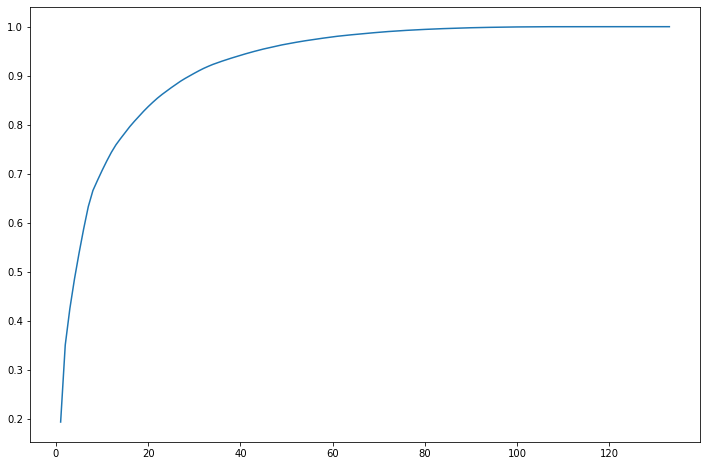

In [99]:
fig = plt.figure(figsize=[12,8])
plt.plot(range(1,len(var_cumu)+1), var_cumu)

## Looking at the scree plot with 50 PCs we have more than 95% of variance explained.

In [100]:
pca_final = IncrementalPCA(n_components=50)

In [101]:
df_train_pca = pca_final.fit_transform(X_resampled)

In [102]:
df_train_pca.shape

(27020, 50)

In [103]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [104]:
corrmat.shape

(50, 50)

In [105]:
corrmat

array([[ 1.00000000e+00, -2.41959651e-07, -2.01322551e-07, ...,
         4.47584948e-05, -3.76784885e-06, -4.15250925e-05],
       [-2.41959651e-07,  1.00000000e+00,  9.77099868e-08, ...,
         5.35884680e-05, -3.46700656e-05, -5.07058287e-05],
       [-2.01322551e-07,  9.77099868e-08,  1.00000000e+00, ...,
         2.43103948e-05, -1.26645120e-04,  1.19131406e-04],
       ...,
       [ 4.47584948e-05,  5.35884680e-05,  2.43103948e-05, ...,
         1.00000000e+00, -6.51387944e-02, -8.71484034e-02],
       [-3.76784885e-06, -3.46700656e-05, -1.26645120e-04, ...,
        -6.51387944e-02,  1.00000000e+00,  3.58681624e-02],
       [-4.15250925e-05, -5.07058287e-05,  1.19131406e-04, ...,
        -8.71484034e-02,  3.58681624e-02,  1.00000000e+00]])

### Applying the transformation on the test set

In [110]:
telecom_test_df_ori.shape

(30000, 133)

In [111]:
df_test_pca = pca_final.transform(telecom_test_df_ori)
df_test_pca.shape

(30000, 50)

## Applying logistic regression on the data on our Principal components

In [112]:
learner_pca = LogisticRegression()

In [113]:
model_pca = learner_pca.fit(df_train_pca, y_resampled)

In [114]:
y_pred_proba = model_pca.predict_proba(df_train_pca)[::,1]

In [115]:
y_pred_proba

array([0.94451877, 0.07729961, 0.09082199, ..., 0.83026488, 0.79989927,
       0.9305987 ])

In [116]:
y_pred_train_final = pd.DataFrame({'Churn_Prob': y_pred_proba})

In [117]:
y_pred_train_final['Churn_Prob_2'] = y_pred_train_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

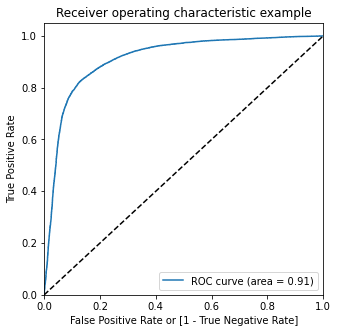

confusion matrix: 
[[10987  2523]
 [ 1745 11765]]
Accuracy:  0.8420429311621022
Precision:  0.8234182530795073
Recall:  0.8708364174685418
F1_score:  0.8464637743722571
AUC score:  0.9117021139041672


In [118]:
metrics_dict = get_accuracy_params(y_resampled, y_pred_train_final.Churn_Prob_2, y_pred_train_final.Churn_Prob, 'Logistic_pca_train')

In [119]:
metrics_dict

{'Logistic_rfe_train': [0.8754256106587713,
  0.8700029180040852,
  0.8827535159141376,
  0.8763318392240429,
  0.9360727722590553],
 'Logistic_rfe_test': [0.8005333333333333,
  0.32192864970169244,
  0.864334749918274,
  0.46912704045422293,
  0.9028844513295365],
 'Logistic_pca_train': [0.8420429311621022,
  0.8234182530795073,
  0.8708364174685418,
  0.8464637743722571,
  0.9117021139041672]}

### Making predictions on the test set

In [120]:
y_pred_proba = model_pca.predict_proba(df_test_pca)[::,1]

In [121]:
y_pred_proba

array([0.15851643, 0.26745596, 0.69893712, ..., 0.63058769, 0.85844423,
       0.0304359 ])

In [122]:
y_pred_test_final = pd.DataFrame({'Churn_Prob': y_pred_proba})

In [123]:
y_pred_test_final['Churn_Prob_2'] = y_pred_test_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

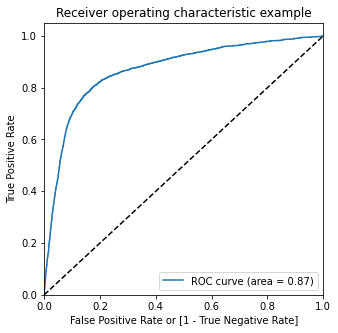

confusion matrix: 
[[17751  9190]
 [  364  2695]]
Accuracy:  0.6815333333333333
Precision:  0.22675641564997898
Recall:  0.8810068649885584
F1_score:  0.36067987152034264
AUC score:  0.8695473438932257


In [125]:
metrics_dict = get_accuracy_params(telecom_test_sol_df.churn_probability, y_pred_test_final.Churn_Prob_2, y_pred_test_final.Churn_Prob, 'Logistic_pca_test')

In [126]:
metrics_dict

{'Logistic_rfe_train': [0.8754256106587713,
  0.8700029180040852,
  0.8827535159141376,
  0.8763318392240429,
  0.9360727722590553],
 'Logistic_rfe_test': [0.8005333333333333,
  0.32192864970169244,
  0.864334749918274,
  0.46912704045422293,
  0.9028844513295365],
 'Logistic_pca_train': [0.8420429311621022,
  0.8234182530795073,
  0.8708364174685418,
  0.8464637743722571,
  0.9117021139041672],
 'Logistic_pca_test': [0.6815333333333333,
  0.22675641564997898,
  0.8810068649885584,
  0.36067987152034264,
  0.8695473438932257]}

##### So we could see the Recall coming close to 88%.
We got a rough idea with PCA and Logistic Regression.
We now move to Lasso and Ridge Regression for further analysis and actual conclusion on right predictors and coefficients.
Let's try other models to see how it performs.

### Ridge and Lasso Regression


#### Ridge Regression

In [128]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  


model_cv.fit(X_resampled, y_resampled)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [129]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [131]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 0.001

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_resampled, y_resampled) 

Ridge(alpha=0.001)

In [132]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.034866,0.004713,0.003740,0.000997,0.0001,{'alpha': 0.0001},-0.320615,-0.324197,-0.320120,-0.312101,...,-0.283072,-0.284439,-0.284158,-0.287271,-0.286171,-0.284317,-0.285041,-0.284938,-0.284547,0.001333
1,0.028857,0.002469,0.002976,0.000518,0.0010,{'alpha': 0.001},-0.320707,-0.324358,-0.320190,-0.312105,...,-0.283079,-0.284445,-0.284155,-0.287274,-0.286191,-0.284335,-0.285062,-0.284961,-0.284556,0.001337
2,0.027572,0.002937,0.003102,0.000794,0.0100,{'alpha': 0.01},-0.321579,-0.325348,-0.320855,-0.312693,...,-0.283091,-0.284510,-0.284155,-0.287408,-0.286500,-0.284634,-0.285362,-0.285271,-0.284701,0.001419
3,0.029450,0.004370,0.003308,0.001019,0.0500,{'alpha': 0.05},-0.324805,-0.328501,-0.324151,-0.315440,...,-0.283225,-0.284687,-0.284293,-0.288223,-0.288005,-0.286170,-0.286925,-0.286845,-0.285468,0.001917
4,0.024432,0.001319,0.002463,0.000169,0.1000,{'alpha': 0.1},-0.328038,-0.331574,-0.327554,-0.318342,...,-0.283849,-0.285336,-0.284943,-0.289676,-0.290164,-0.288354,-0.289145,-0.289091,-0.286808,0.002572


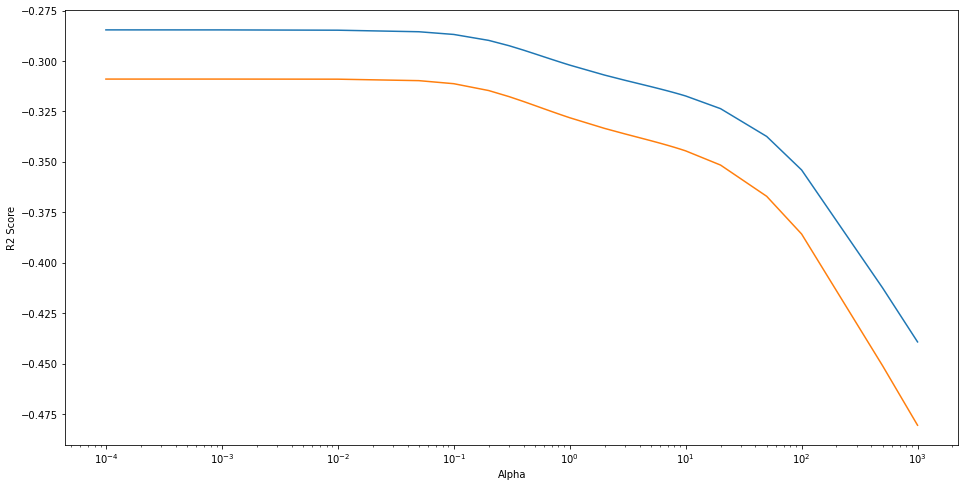

In [133]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

## Looking at the curve, as they are not converging we will go ahead and check Lasso model.

In [141]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  


model_cv.fit(X_resampled, y_resampled)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [142]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [144]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_resampled, y_resampled) 

Lasso(alpha=0.0001)

In [145]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.157530,0.126196,0.004162,0.000583,0.0001,{'alpha': 0.0001},-0.342278,-0.345100,-0.342348,-0.333535,...,-0.293442,-0.294932,-0.294280,-0.300558,-0.301876,-0.300102,-0.300861,-0.300816,-0.297352,0.003552
1,0.062878,0.004534,0.003454,0.000379,0.0010,{'alpha': 0.001},-0.378926,-0.382281,-0.376871,-0.370193,...,-0.329870,-0.331770,-0.330459,-0.340892,-0.344079,-0.342818,-0.343892,-0.343896,-0.336680,0.006524
2,0.040476,0.003438,0.002981,0.000296,0.0100,{'alpha': 0.01},-0.523678,-0.522865,-0.525868,-0.522193,...,-0.481757,-0.481371,-0.482079,-0.485856,-0.481041,-0.480705,-0.480439,-0.480348,-0.481620,0.001506
3,0.039441,0.007013,0.011713,0.026458,0.0500,{'alpha': 0.05},-0.538660,-0.538455,-0.539627,-0.538866,...,-0.495597,-0.495682,-0.495643,-0.499784,-0.493827,-0.493827,-0.493827,-0.493827,-0.495345,0.001716
4,0.033308,0.002227,0.002899,0.000222,0.1000,{'alpha': 0.1},-0.538660,-0.538455,-0.539627,-0.538866,...,-0.495597,-0.495682,-0.495643,-0.499784,-0.493827,-0.493827,-0.493827,-0.493827,-0.495345,0.001716


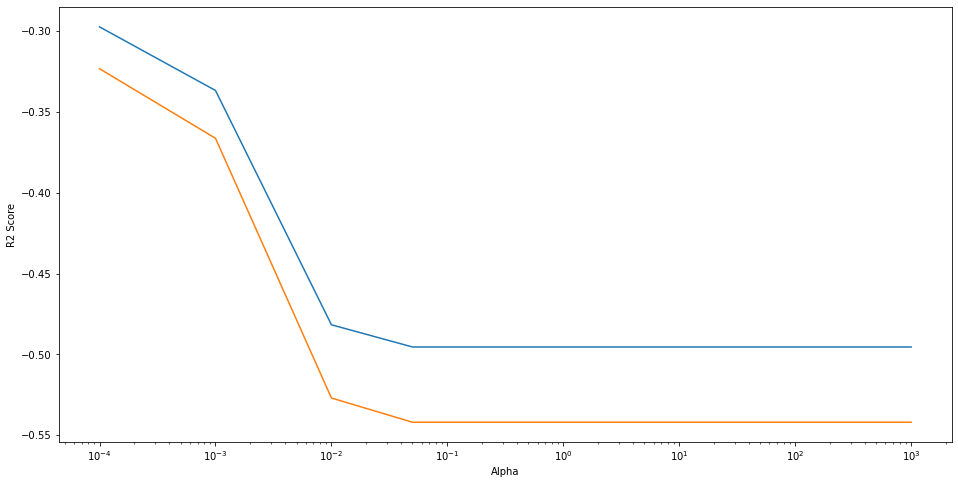

In [146]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

## Looking at the curve, as they are not converging it seems even Lasso model is not working well here.